In [25]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from scipy import ndimage # Multi-dimensional image processing

In [5]:
'''
    Each pixel in this 3, 3 image is represented by an 8 bit iteger. That's how we get 2^8 = 256 discrete possible values for
    each pixel.
'''
img = np.zeros((3, 3), dtype = np.uint8)
img

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=uint8)

In [6]:
'''
    When we convert it to 3 channels (BGR) we get 3 different copies of our otiginal image array for each of the 3 color 
    channels
'''
img_BGR = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
img_BGR

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [7]:
os.chdir('Sample Images/Malignant')

In [ ]:
'''
    We read a melanoma image and play around with it. We convert it to grayscale and save it. The size for this specific img
    is 480X640 in grayscale. IMAGES ARE NOT ALL OF THE SAME SIZE...
'''
gray_malignant_img = cv2.imread('ISIC_0647224.jpg', cv2.IMREAD_GRAYSCALE)
cv2.imwrite('ISIC_0647224_grayscale.jpg', gray_malignant_img)

In [8]:
'''
    Next we use the concept of byte-arrays. This is a 1D representation of an image. We can convert back and forth to the rep
    as follows.
    
    Notice how 120000 = 300*400 and 400*100*3
'''

#Make and array of 120,000 random bytes. urandom generates 120,000 radnom values between 0 and 255 simulating 8-bit rep of pixels
random_byte = bytearray(os.urandom(12000000))
flatnumpyarray = np.array(random_byte)

#Convert the array to make a 400X300 grayscale image
gray_img = flatnumpyarray.reshape(4000, 3000)
cv2.imwrite('RandomGrayImg.jpeg', gray_img)

#Convert the array to a 400*100 color image
color_img = flatnumpyarray.reshape(4000, 1000, 3)
cv2.imwrite('RandomColorImg.jpeg', color_img)

True

In [43]:
'''
    Using 'item' and 'itemset functionalities from numpy to modify adn display image pixel values
    Note - we can also emply slicing 
'''
random_byte = bytearray(os.urandom(27))
flatten_array = np.array(random_byte)

color_img_small = flatten_array.reshape(3, 3, 3)

#Using item_set to change value of a certain pixel. Was 55 initally, we change it to 255... (all red - assuming BGR)
color_img_small.item((0, 1, 2))
color_img_small.itemset((0, 1, 2), 255)
color_img_small.item((0, 1, 2))


255

<function matplotlib.pyplot.show(*args, **kw)>

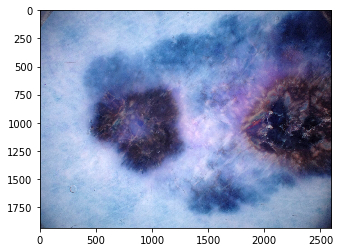

In [16]:
'''
    Displaying images in-window
'''
malignant_img = cv2.imread('ISIC_5867911.jpg')
plt.imshow(malignant_img)
plt.show

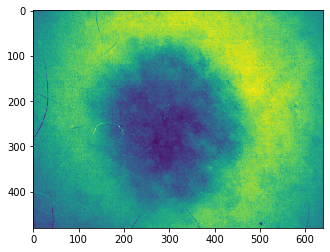

In [44]:
'''
    Applying a high-pass filter to an image. HPF looks at a bunch of pixels and boosts the intensity of certain pixels 
    depending on the intensity of the surrounding pixels.
'''

'''
A kernel is a set of weights that are applied to a region in a source image to generate a single pixel in the destination 
image. For example, if we call an OpenCV function with a parameter to specify a kernel size or ksize of 7, this implies 
that 49 (7 x 7) source pixels are considered when generating each destination pixel. 
'''

kernel_3x3 = np.array([[-1, -1, -1],
                        [-1, 8, -1],
                        [-1, -1, -1]])

kernel_5x5 = np.array([[-1, -1, -1, -1, -1],
                        [-1, 1, 2, 1, -1],
                        [-1, 2, 4, 2, -1],
                        [-1, 1, 2, 1, -1],
                        [-1, -1, -1, -1, -1]])

#We load the image in grayscale. If the image is in BGR, then our kernels will have to be 3D.
img = cv2.imread('ISIC_1834920.jpg', cv2.IMREAD_GRAYSCALE)

'''
    This works in a way like a convolutional layer
'''
k3 = ndimage.convolve(img, kernel_3x3)
k5 = ndimage.convolve(img, kernel_5x5)
plt.imshow(img)

k3 shape -  (480, 640)
k5 shape -  (480, 640)


(<matplotlib.axes._subplots.AxesSubplot at 0x284a4223cf8>,
 Text(0.5, 1.0, 'k5'))

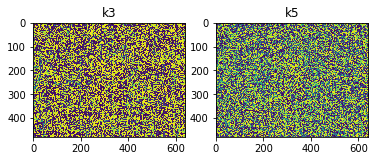

In [54]:
'''
    Visualising the k3 and k5 - How convolving works
'''
print('k3 shape - ', k3.shape)
print('k5 shape - ',k5.shape)
plt.subplot(121), plt.imshow(k3), plt.title('k3')
plt.subplot(122), plt.imshow(k5), plt.title('k5')

(<matplotlib.axes._subplots.AxesSubplot at 0x284a55d37b8>,
 Text(0.5, 1.0, 'Gaussian Smoothing'))

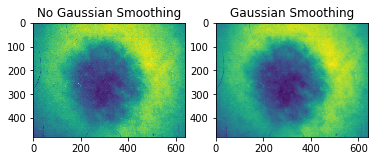

In [59]:
'''
    Blurring using a Gaussian Blur - Type of smoothing to reduce noise and detail in image. instead of a box filter 
    consisting of equal filter coefficients, a Gaussian kernel is used. It is done with the function, cv2.GaussianBlur(). 
    We should specify the width and height of the kernel which should be positive and odd. We also should specify the 
    standard deviation in the X and Y directions, sigmaX and sigmaY respectively. If only sigmaX is specified, sigmaY is 
    taken as equal to sigmaX. If both are given as zeros, they are calculated from the kernel size. Gaussian filtering is 
    highly effective in removing Gaussian noise from the image.
    
    GaussianBlur(source, ksize = (5,5), sigmaX = 0, sigmaY = 0)
'''

g_img = cv2.GaussianBlur(img, ksize = (5,5), sigmaX = 0, sigmaY = 0)
plt.subplot(121), plt.imshow(img), plt.title('No Gaussian Smoothing')
plt.subplot(122), plt.imshow(g_img), plt.title('Gaussian Smoothing')